# K-means clustering

## import library

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [4]:
fname_data = 'assignment_11_data.csv'

feature = np.genfromtxt(fname_data, delimiter=',')

x = feature[:,0]
y = feature[:,1]

number_data     = np.size(feature, 0)
number_feature  = np.size(feature, 1)

print('number of data : {}'.format(number_data))
print('number of feature : {}'.format(number_feature))

number of data : 1000
number of feature : 2


## plot the input data

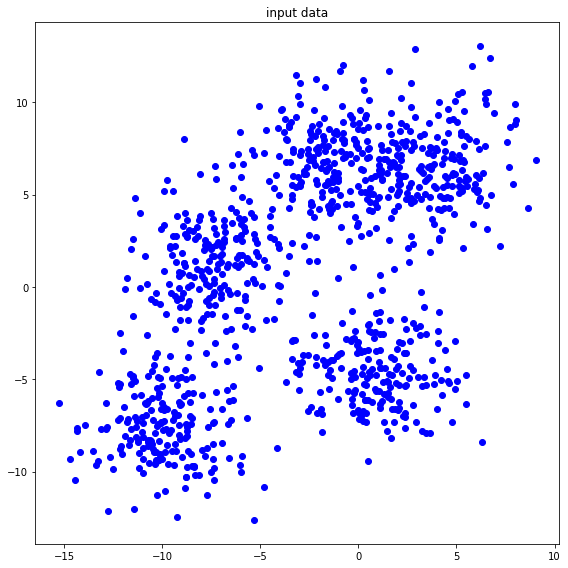

In [5]:
plt.figure(figsize=(8,8))   
plt.title('input data')

plt.scatter(x, y, color='blue')

plt.tight_layout()
plt.show()

## compute distance
- feature : $n \times m$, center : $1 \times m$, distance : $n \times 1$
- $n$ : number of data, $m$ : number of features

In [6]:
def compute_distance(feature, center):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    #distance=sum([(i - j)**2 for i, j in list(zip(feature, center))]) ** 0.5
    distance=np.linalg.norm(feature - center, axis=1)
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return distance

## compute centroid
- feature : $n \times m$, label_feature : $n \times 1$, value_label : $1 \times 1$, centroid : $1 \times m$
- $n$ : number of data, $m$ : number of features

In [7]:
#0이 들어오면 0의 라벨을 갖는 점들의 센트로이드를 구한다.
# compute_centroid(feature, centroid_iteration_02, label_feature_02)

def compute_centroid(feature, label_feature, label):#label은 그냥 숫자이고, labelfeature가 라벨링 !!
    label0=[]
    for i,fea in enumerate(feature):
        if label_feature[i]==label :
            label0.append(fea)
    #rint(label0)
    MeanLabel0=[]
    #print("np.mean(label0[:,0]):",np.mean(label0[0]))
    #print("np.mean(label0[:,0]):",np.mean(label0[1]))
    MeanLabel0=[np.mean(label0[0]),np.mean(label0[1])]
    centroid=MeanLabel0
    return centroid

In [9]:
# #각각 라벨의 센트로이드값을 정의한다.  
# def compute_centroid(feature, label_feature, label):
#     #피쳐는 엔바이엠이다.  2차원 평면에서의 포인트들이 피쳐벡터
#     #센터란것은 하나의 포인트가 되는 것이다 .
#     #각각의 포인트에서 여기까지의 거리.
#     #각각의 포인트에서 센터까지의 거리. 
#     #라벨 피쳐는 케이개를 나타낸다. 0~케이-1까지가 된다는 뜻이다. 
#     #세번째 파라미터는 만약 0이들어오면 0의 라벨을 갖는 점들의 센트로이드를 구하고 1이들어오면 1의 라벨을 갖는 점들의 센트로이드를 구하는 것ㅇ디ㅏ.
#     #5개면 0,1,2,3,4의 라벨이되는것이지. 
#     # ++++++++++++++++++++++++++++++++++++++++++++++++++
#     # complete the blanks
#     #
#     assigned_centroid = []
#     for i in feature:
#         distance=[]
#         for j in label_feature:
#             distance.append(compute_distance(i, j))
#         assigned_centroid.append(compute_label(distance))
#     centroid=assigned_centroid
#     #
#     # ++++++++++++++++++++++++++++++++++++++++++++++++++

#     return centroid

## compute label
- distance : $n \times k$, label_feature : $n \times 1$
- $n$ : number of data, $k$ : number of clusters

In [10]:
def compute_label(distance):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    label_feature=np.argmin(distance,axis=0)
    # label_feature=[]
    # for i in range(len(distance)):
    #     print("distance[i]",distance[i].shape)
    #     label_feature.append(np.argmin(distance[i]))
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return label_feature


## the number of clusters $K = 2$

In [11]:
number_cluster          = 2
number_iteration        = 1     # you can modify this value
loss_iteration_02       = np.zeros(number_iteration)#각각의 이터레이션마다의 로스를 저
centroid_iteration_02   = np.zeros((number_iteration, number_cluster, number_feature))#각각의 이터레이션마다의 센트로이드저
label_feature_02        = np.random.randint(0, number_cluster, size=(number_data))#최종 각 점의 레이블을 결정한다. 

In [12]:
loss_iteration_02

array([0.])

In [26]:
dis.shape

(1000,)

In [27]:
np.min(dataFrame,axis=0)

array([ 4.79579517,  4.63487619,  7.85340836,  5.69717211,  5.99240768,
       11.85820531,  7.29981636,  5.97131544,  4.76182851,  3.18683151,
       13.43051604,  2.64211865,  6.98702733,  2.448885  ,  6.10044592,
        4.07013654,  2.06625432,  5.69191729,  7.50126251,  1.91762082,
        2.90388863,  6.03907131,  2.37970245, 12.37439379,  5.65101921,
        6.60856508,  3.19005259,  2.44202928,  5.24944501,  6.29787702,
        6.63024651,  7.70224892,  5.13637054,  9.48884982,  7.05018273,
        4.66972778,  7.42662243,  7.04202805,  5.30455966,  9.44243591,
        6.48429198,  7.74757374,  0.67611015, 12.16812344,  2.27238447,
        7.30577079,  5.84525528, 10.62578704,  8.19360478, 13.51781855,
       13.92053423, 14.40811567,  7.54763105,  4.03415117,  6.65921888,
        4.46067557, 12.29422813,  7.37769473, 11.27443753,  5.70770193,
       10.13054558, 14.84863625,  4.44669785,  4.98771846, 10.91341438,
        8.16482726, 11.18730814,  4.91606677, 13.61574263,  6.57

In [31]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#
choice=[]
dataFrame=[]
label0=[]
label1=[]
dis=[]
for i in range(5):#일정 수만큼 반복 
    for k in range(number_cluster):#각각의 클러스터마다 거리를 계산한다. 
        center=compute_centroid(feature, label_feature_02, k) #각 레이블을 가지고있는 포인트들의 중심점을 계산한다.
        print(center)
        dis=compute_distance(feature, center)#그 중심점과 각각의 피쳐포인트간의 거리를 계싼한다. 
        if k==0:
            label0=np.append(label0, dis)
        if k==1:
            label1=np.append(label1, dis)     
    label0=np.array(label0)
    label1=np.array(label1)
    dataFrame=np.vstack((label0,label1))
    #print(dataFrame)    
    final=compute_label(dataFrame)
    minValue=np.min(dataFrame,axis=0)#두 레이블 중 최솟값만을 선택 
    loss=(1/1000)*np.sum(minValue)#최솟값의 평균값을 구한다.
    loss_iteration_02=np.append(loss_iteration_02,loss)#로스를 누적하여 저장한다. 
    print(loss_iteration_02)
    label0=[]
    label1=[]


#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

[-1.3915117118210754, 1.5485998627701099]
[1.6784646094899403, -2.4269960249970737]
[0.        7.0284203 7.0284203]
[-1.3915117118210754, 1.5485998627701099]
[1.6784646094899403, -2.4269960249970737]
[0.        7.0284203 7.0284203 7.0284203]
[-1.3915117118210754, 1.5485998627701099]
[1.6784646094899403, -2.4269960249970737]
[0.        7.0284203 7.0284203 7.0284203 7.0284203]
[-1.3915117118210754, 1.5485998627701099]
[1.6784646094899403, -2.4269960249970737]
[0.        7.0284203 7.0284203 7.0284203 7.0284203 7.0284203]
[-1.3915117118210754, 1.5485998627701099]
[1.6784646094899403, -2.4269960249970737]
[0.        7.0284203 7.0284203 7.0284203 7.0284203 7.0284203 7.0284203]


In [14]:
dataFrame

array([[ 4.79579517,  4.63487619,  7.85340836, ..., 12.04023608,
         4.79767337,  7.46140935],
       [ 9.65712596,  9.23714132, 12.33699176, ..., 13.12510829,
         0.56016266, 11.41751293]])

In [15]:
final.shape

(1000,)

In [16]:
label0=np.array(label0)
label1=np.array(label1)
dataFrame=np.vstack((label0,label1))

In [17]:
#1000개 점에 대하여 각각의 라벨 센트로이드와의 디스턴스를 나타낸다. 그리고 여기서 작은값을 나타내는게 위의 파이널이다. 
import pandas as pd
dataFrame2=pd.DataFrame(dataFrame)
dataFrame2.T

,0,1
0,4.795795,9.657126
1,4.634876,9.237141
2,7.853408,12.336992
3,5.697172,10.639657
4,7.055651,5.992408
...,...,...
995,5.559744,9.895473
996,8.225785,12.192672
997,12.040236,13.125108
998,4.797673,0.560163


In [18]:
import pandas as pd
dataFrame1=pd.DataFrame(label0)
dataFrame1.T

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,4.795795,4.634876,7.853408,5.697172,7.055651,11.858205,7.299816,5.971315,5.056633,7.10352,...,14.45911,8.333467,11.707678,7.029123,2.688623,5.559744,8.225785,12.040236,4.797673,7.461409


In [19]:
import pandas as pd
dataFrame2=pd.DataFrame(label1)
dataFrame2.T

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,9.657126,9.237141,12.336992,10.639657,5.992408,12.713242,10.539507,8.934697,4.761829,3.186832,...,14.251145,4.565244,10.937799,9.049678,7.313392,9.895473,12.192672,13.125108,0.560163,11.417513


In [20]:
import pandas as pd
dataFrame2=pd.DataFrame(dataFrame)
dataFrame2.T

,0,1
0,4.795795,9.657126
1,4.634876,9.237141
2,7.853408,12.336992
3,5.697172,10.639657
4,7.055651,5.992408
...,...,...
995,5.559744,9.895473
996,8.225785,12.192672
997,12.040236,13.125108
998,4.797673,0.560163


In [21]:
dataFrame

array([[ 4.79579517,  4.63487619,  7.85340836, ..., 12.04023608,
         4.79767337,  7.46140935],
       [ 9.65712596,  9.23714132, 12.33699176, ..., 13.12510829,
         0.56016266, 11.41751293]])

In [22]:
a=compute_centroid(feature, label_feature_02, 0)
a

[-1.3915117118210754, 1.5485998627701099]

In [23]:
centroid_iteration_02.shape

(1, 2, 2)

In [24]:
m1

NameError: name 'm1' is not defined

In [ ]:
# #1. initialize random
# centroid_iteration_02
# #2. compute centroid
# compute_centroid(feature, centroid_iteration_02, label_feature_02)
# #3. assign label
# distance=compute_distance(feature, center)
# ans=compute_label(distance)

## the number of clusters $K = 4$

In [ ]:
number_cluster          = 4
number_iteration        = 2     # you can modify this value
loss_iteration_04       = np.zeros(number_iteration)
centroid_iteration_04   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_04        = np.random.randint(0, number_cluster, size=(number_data))

In [ ]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#


#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

## the number of clusters $K = 8$

In [ ]:
number_cluster          = 8
number_iteration        = 2     # you can modify this value
loss_iteration_08       = np.zeros(number_iteration)
centroid_iteration_08   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_08        = np.random.randint(0, number_cluster, size=(number_data))

In [ ]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#


#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

## the number of clusters $K = 16$

In [ ]:
number_cluster          = 16
number_iteration        = 2     # you can modify this value
loss_iteration_16       = np.zeros(number_iteration)
centroid_iteration_16   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_16        = np.random.randint(0, number_cluster, size=(number_data))

In [ ]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#


#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

---

---

## functions for presenting the results

---

---

In [ ]:
def function_result_01():

    print("final loss (K=2) = {:13.10f}".format(loss_iteration_02[-1]))
    

In [ ]:
def function_result_02():

    print("final loss (K=4) = {:13.10f}".format(loss_iteration_04[-1]))
    

In [ ]:
def function_result_03():

    print("final loss (K=8) = {:13.10f}".format(loss_iteration_08[-1]))
    

In [ ]:
def function_result_04():

    print("final loss (K=16) = {:13.10f}".format(loss_iteration_16[-1]))
    

In [ ]:
def function_result_05():
    
    plt.figure(figsize=(8,6)) 
    plt.title('loss (K=2)')

    plt.plot(loss_iteration_02, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [ ]:
def function_result_06():
    
    plt.figure(figsize=(8,6)) 
    plt.title('loss (K=4)')

    plt.plot(loss_iteration_04, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [ ]:
def function_result_07():
    
    plt.figure(figsize=(8,6))
    plt.title('loss (K=8)')

    plt.plot(loss_iteration_08, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [ ]:
def function_result_08():
    
    plt.figure(figsize=(8,6))
    plt.title('loss (K=16)')

    plt.plot(loss_iteration_16, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [ ]:
def function_result_09():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=2)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [ ]:
def function_result_10():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=4)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [ ]:
def function_result_11():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=8)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [ ]:
def function_result_12():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=16)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [ ]:
def function_result_13():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=2)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [ ]:
def function_result_14():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=4)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [ ]:
def function_result_15():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=8)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [ ]:
def function_result_16():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=16)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

---

---

## results

---

---

**************************************************
## [RESULT 01]
**************************************************
final loss (K=2) =  0.0000000000
**************************************************
## [RESULT 02]
**************************************************
final loss (K=4) =  0.0000000000
**************************************************
## [RESULT 03]
**************************************************
final loss (K=8) =  0.0000000000
**************************************************
## [RESULT 04]
**************************************************
final loss (K=16) =  0.0000000000
**************************************************
## [RESULT 05]
**************************************************


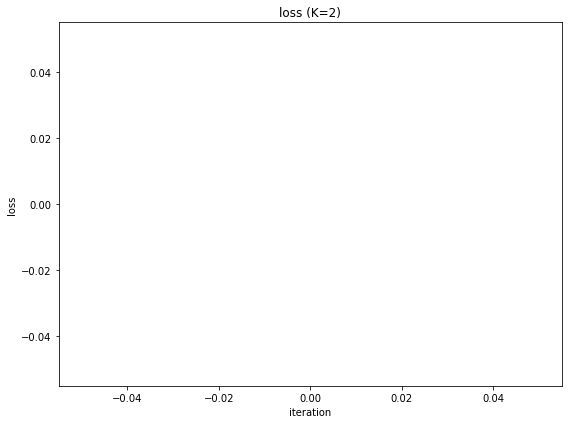

**************************************************
## [RESULT 06]
**************************************************


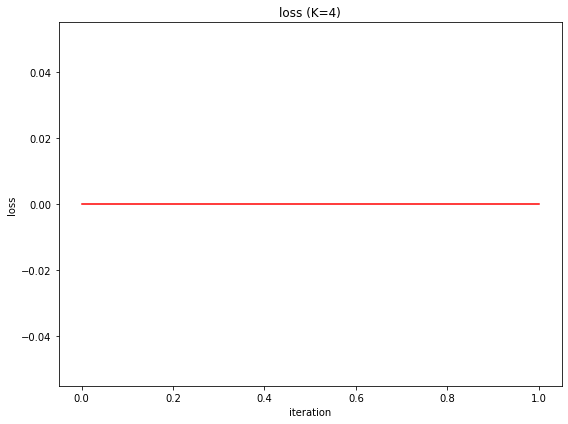

**************************************************
## [RESULT 07]
**************************************************


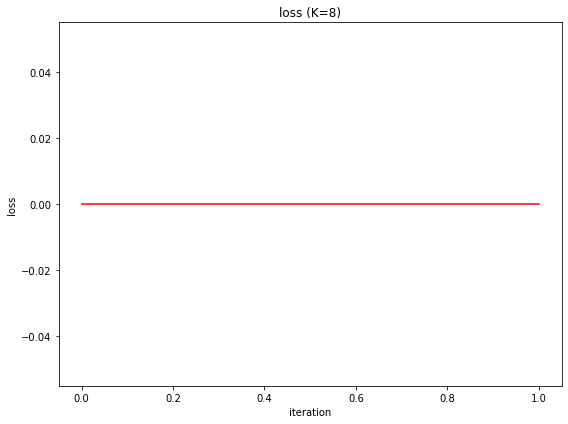

**************************************************
## [RESULT 08]
**************************************************


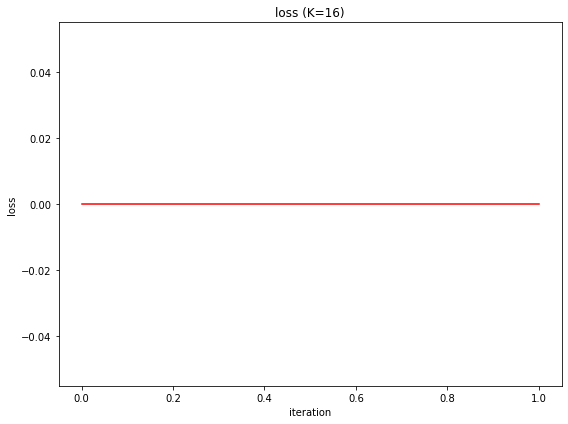

**************************************************
## [RESULT 09]
**************************************************
**************************************************
## [RESULT 10]
**************************************************
**************************************************
## [RESULT 11]
**************************************************
**************************************************
## [RESULT 12]
**************************************************
**************************************************
## [RESULT 13]
**************************************************
**************************************************
## [RESULT 14]
**************************************************
**************************************************
## [RESULT 15]
**************************************************
**************************************************
## [RESULT 16]
**************************************************


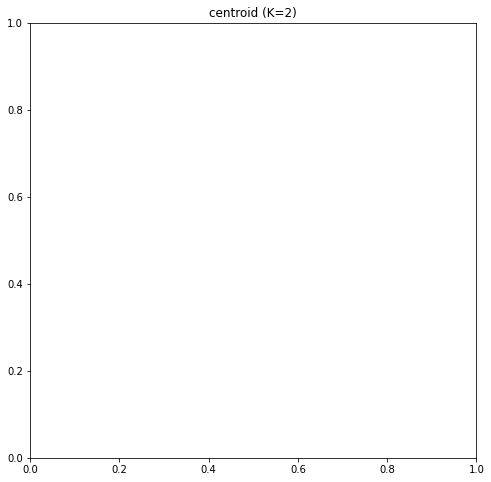

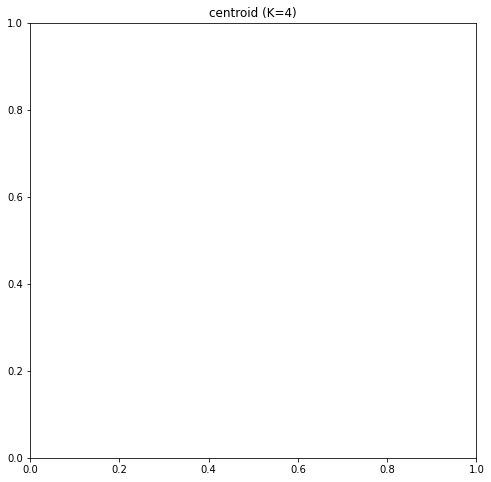

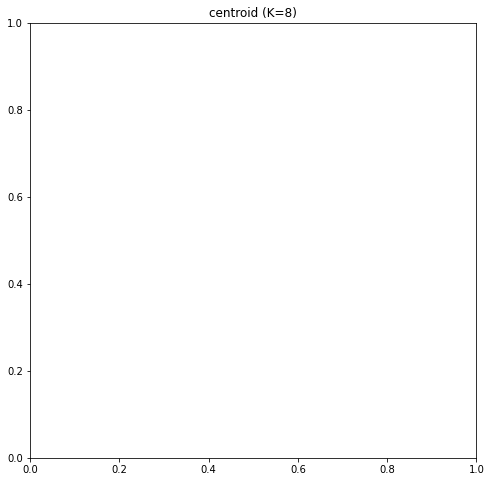

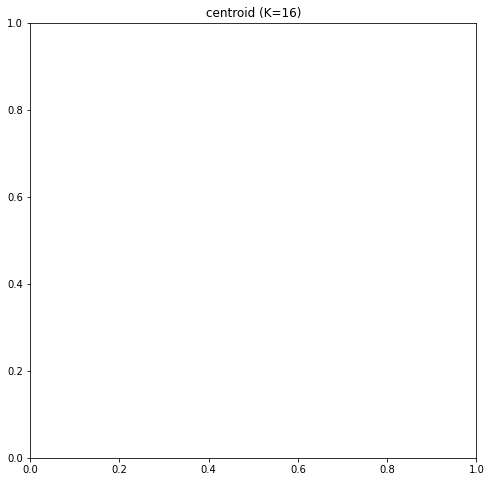

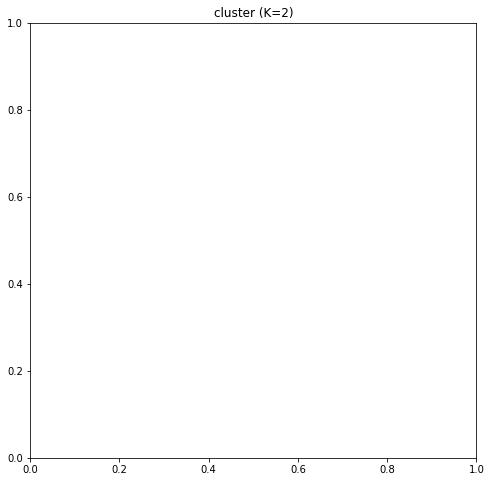

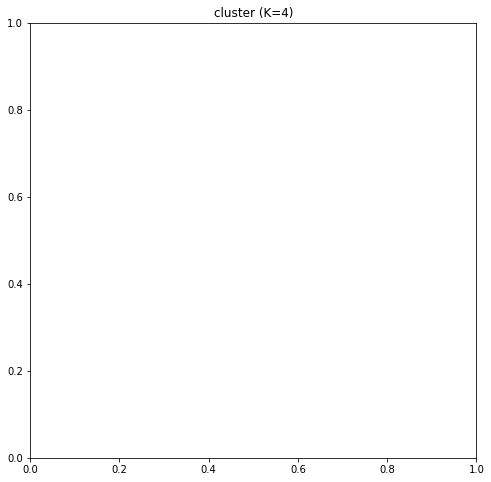

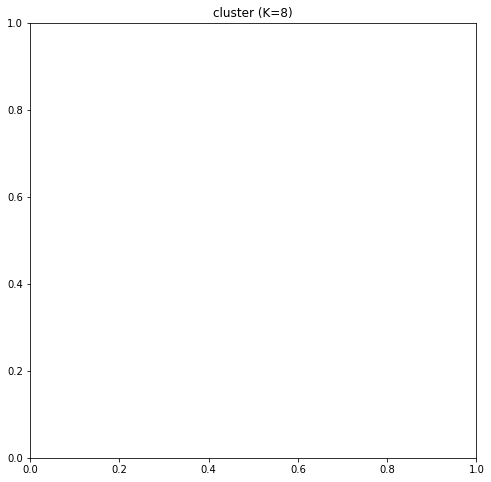

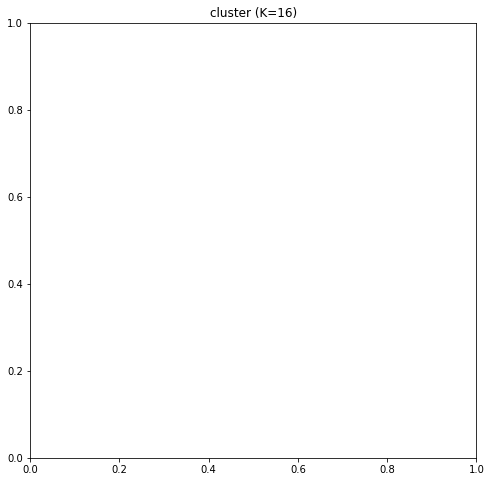

In [ ]:
number_result = 16

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)